<a href="https://colab.research.google.com/github/fatihgumuss/machine-learning-and-nlp/blob/main/Kopia_notatnika_NLP_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import requests
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import collections
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
nltk.download('stopwords')
nltk.download('punkt')
corpus_urls = [
    "https://www.gutenberg.org/files/1342/1342-0.txt",
    "https://www.gutenberg.org/files/74/74-0.txt",
    "https://www.gutenberg.org/cache/epub/1497/pg1497.txt",
    "https://www.gutenberg.org/files/1661/1661-0.txt",
    "https://www.gutenberg.org/cache/epub/345/pg345.txt"

]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


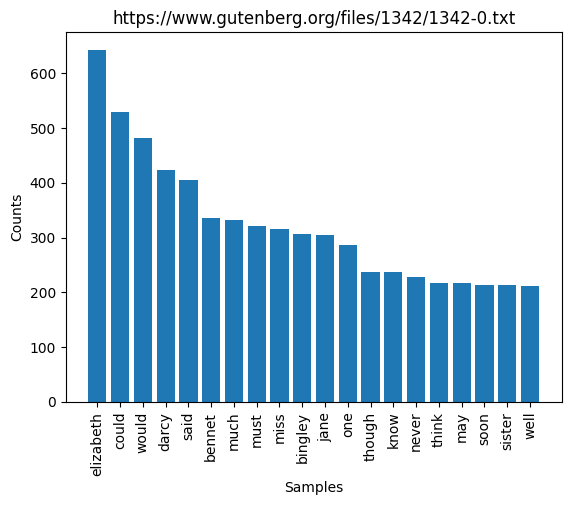

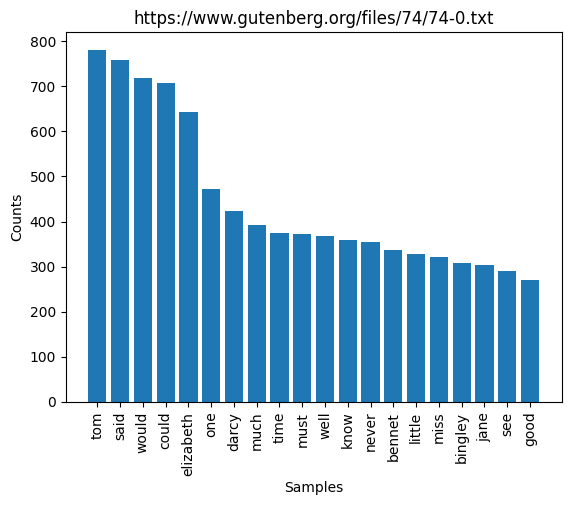

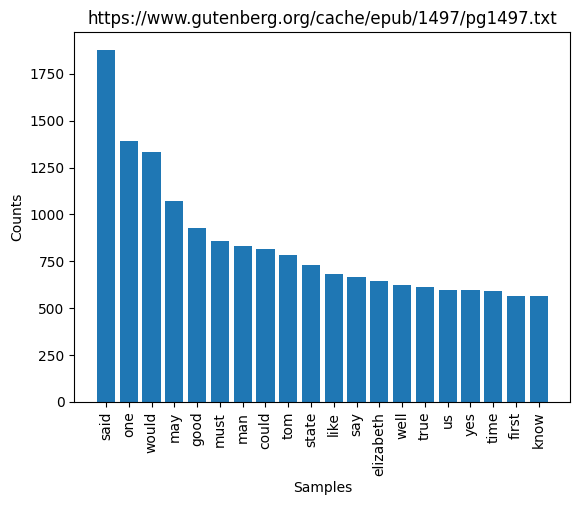

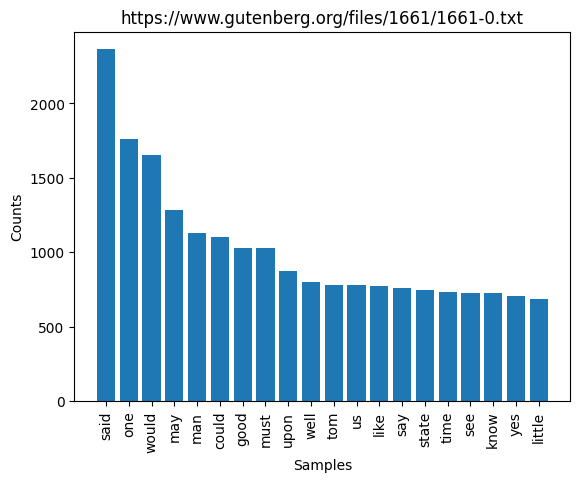

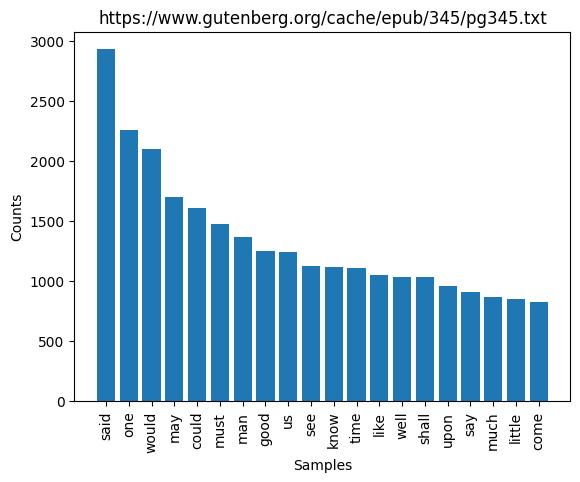

In [ ]:
counter = collections.Counter()
corpus = []

for url in corpus_urls:
    response = requests.get(url)
    text = response.content.decode('utf-8')
    tokens = word_tokenize(text)
    tokens = [token.lower() for token in tokens if token.isalnum() and token.lower() not in stopwords.words('english')]

    corpus.append(tokens)

    counter.update(tokens)
    freq_dist = nltk.FreqDist(counter)

    top_words = freq_dist.most_common(20)

    words, freqs = zip(*top_words)

    plt.bar(words, freqs)
    plt.xticks(rotation=90)
    plt.title(url)
    plt.xlabel("Samples")
    plt.ylabel("Counts")
    plt.show()



In [ ]:
l1 = ['a', 'b', 'c']
l2 =[1,  2, 3]
for x,y in zip(l1, l2):
  print(x,y)

In [ ]:
for i in range(len(l1)):
  print(l1[i], l2[i])


In [ ]:
token_elem = [elem[0] for elem in top_words ]
print (token_elem)


In [ ]:
count_elem = [elem[1] for elem in top_words ]
print (count_elem)

In [ ]:
words, freqs = zip(*top_words)

In [ ]:
print(words)

('said', 'one', 'would', 'may', 'could', 'must', 'man', 'good', 'us', 'see', 'know', 'time', 'like', 'well', 'shall', 'upon', 'say', 'much', 'little', 'come')


In [ ]:
print(freqs)

(2933, 2265, 2104, 1703, 1613, 1477, 1372, 1254, 1241, 1124, 1117, 1114, 1056, 1039, 1039, 964, 908, 869, 855, 829)


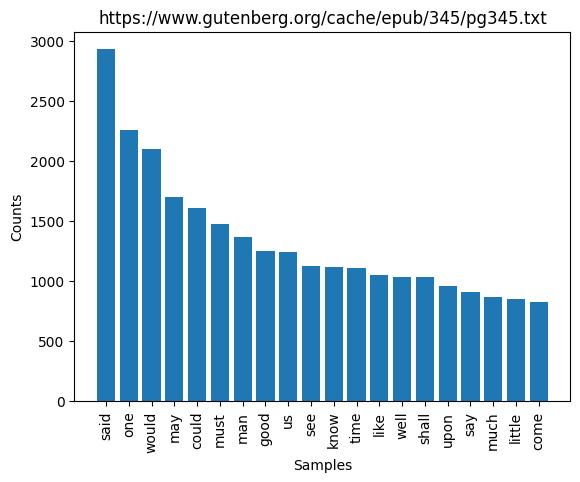

In [ ]:
plt.bar(token_elem, count_elem)
plt.xticks(rotation=90)
plt.title(url)
plt.xlabel("Samples")
plt.ylabel("Counts")
plt.show()


In [ ]:
corpus_urls

['https://www.gutenberg.org/files/1342/1342-0.txt',
 'https://www.gutenberg.org/files/74/74-0.txt',
 'https://www.gutenberg.org/cache/epub/1497/pg1497.txt',
 'https://www.gutenberg.org/files/1661/1661-0.txt',
 'https://www.gutenberg.org/cache/epub/345/pg345.txt']

In [ ]:
corpus1 = [ " ".join(book) for book in corpus]

In [ ]:
print(corpus1)

['project gutenberg ebook pride prejudice jane austen ebook use anyone anywhere united states parts world cost almost restrictions whatsoever may copy give away terms project gutenberg license included ebook online located united states check laws country located using ebook title pride prejudice author jane austen release date november 12 2022 ebook 1342 recently updated march 14 2023 language english produced chuck greif online distributed proofreading team http file produced images available internet archive start project gutenberg ebook pride prejudice illustration george allen publisher 156 charing cross road london ruskin house illustration jane pride prejudice jane austen preface george saintsbury illustrations hugh thomson illustration 1894 ruskin 156 charing house cross road london george allen chiswick press charles whittingham tooks court chancery lane london illustration comyns carr acknowledgment owe friendship advice illustrations gratefully preface illustration whitman s

In [ ]:

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus1)
tfidf_matrix.shape

(5, 20136)

In [ ]:

vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus1)
similarity_matrix = cosine_similarity(tfidf_matrix)
#print(similarity_matrix)

#np.fill_diagonal(similarity_matrix, 0)
print('***************')
print(similarity_matrix)

most_similar = np.unravel_index(similarity_matrix.argmax(), similarity_matrix.shape)
most_different = np.unravel_index(similarity_matrix.argmin(), similarity_matrix.shape)

print("The most similar documents are", most_similar)
print("The most different documents are", most_different)



***************
[[1.         0.17856498 0.28237565 0.30980208 0.3119564 ]
 [0.17856498 1.         0.24526487 0.28649298 0.32835405]
 [0.28237565 0.24526487 1.         0.40399295 0.42328448]
 [0.30980208 0.28649298 0.40399295 1.         0.51250683]
 [0.3119564  0.32835405 0.42328448 0.51250683 1.        ]]
The most similar documents are (3, 3)
The most different documents are (0, 1)


TypeError: ignored

In [ ]:
t =np.array([[1,2],[5,4]])
print(t)
print(t.argmax())

print(np.unravel_index(2,[2,2]))

[[1 2]
 [5 4]]
2
(1, 0)


In [ ]:
similarity_matrix

array([[1.        , 0.17856498, 0.28237565, 0.30980208, 0.3119564 ],
       [0.17856498, 1.        , 0.24526487, 0.28649298, 0.32835405],
       [0.28237565, 0.24526487, 1.        , 0.40399295, 0.42328448],
       [0.30980208, 0.28649298, 0.40399295, 1.        , 0.51250683],
       [0.3119564 , 0.32835405, 0.42328448, 0.51250683, 1.        ]])

In [ ]:
min_distance  = 1000
max_distance = 0
min_distance_index = None
max_distance_index = None
document_count  = similarity_matrix.shape[0]
for i in range(document_count):
  print('similarities for document', i)
  for j in range(i+1,document_count):
    print("simialirity",  similarity_matrix[i,j])
    if similarity_matrix[i,j] > max_distance:
      max_distance =  similarity_matrix[i,j]
      max_distance_index = (i,j)

    if similarity_matrix[i,j] < min_distance:
      min_distance =  similarity_matrix[i,j]
      min_distance_index = (i,j)
print('**********')
print(max_distance, max_distance_index)
print(min_distance, min_distance_index)

similarities for document 0
simialirity 0.17856497550788006
simialirity 0.28237565321339364
simialirity 0.3098020847230666
simialirity 0.3119563993483973
similarities for document 1
simialirity 0.24526487284827292
simialirity 0.28649297663550527
simialirity 0.32835405208640456
similarities for document 2
simialirity 0.40399294851160594
simialirity 0.42328447614194237
similarities for document 3
simialirity 0.5125068343013782
similarities for document 4
**********
0.5125068343013782 (3, 4)
0.17856497550788006 (0, 1)


In [ ]:
similarity_matrix.shape[0]

5

In [ ]:
tfidf_matrix.shape

(5, 20136)

In [ ]:
tfidf_matrix.todense()

matrix([[0.00045272, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00037261, 0.00640314, 0.0005336 , ..., 0.00066138, 0.00066138,
         0.00066138],
        [0.00073512, 0.0031582 , 0.00842186, ..., 0.        , 0.        ,
         0.        ],
        [0.00048708, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
tfidf_dense = np.asarray(tfidf_matrix.todense())
pca_output = pca.fit_transform(tfidf_dense)
print(pca_output)


[[-0.53263923  0.58763029]
 [ 0.72129386  0.34553112]
 [-0.13576012 -0.34559473]
 [-0.06538719 -0.31057792]
 [ 0.01249268 -0.27698877]]


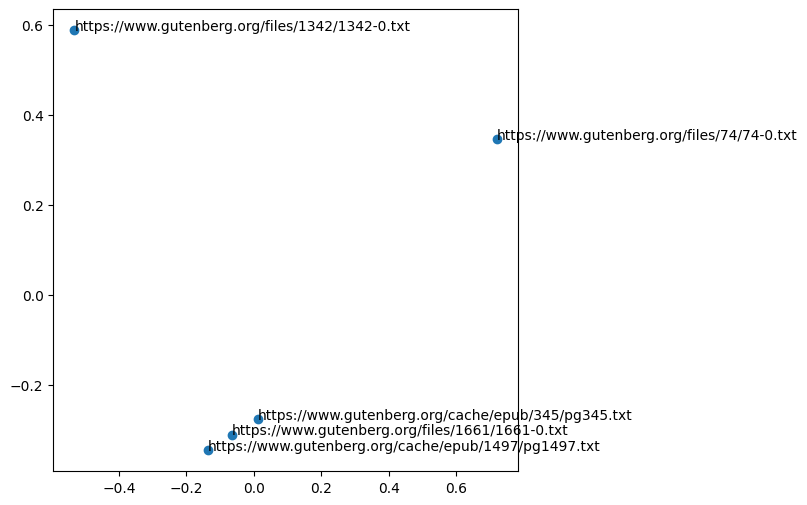

In [ ]:
x=[x[0] for x in pca_output]
y=[x[1] for x in pca_output]

fig, ax  = plt.subplots(figsize=(6,6))
ax.scatter(x,y)

for i, url in (enumerate (corpus_urls)):
  ax.annotate(url, (x[i], y[i]))



In [ ]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)

print(pca.singular_values_)

[0.99244289 0.00755711]
[6.30061232 0.54980396]


In [ ]:
print(X)

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]
